## Multi-body Orbits

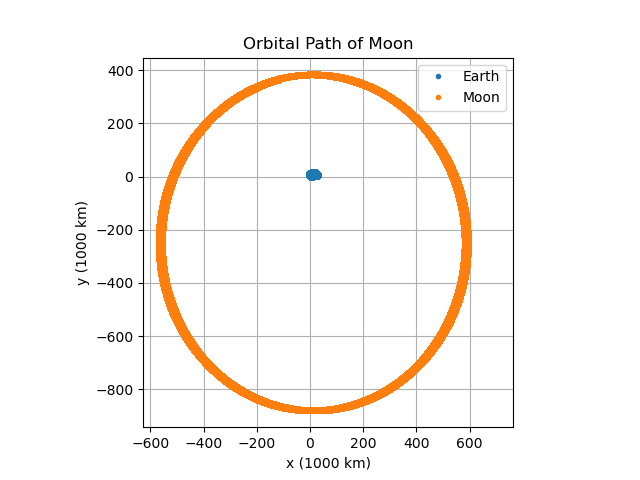

In [24]:
# Import matplotlib for plotting
# and numpy (NUMerical PYthon) to do fancy stuff
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

# Initialize some variables ######################################################################################################
G = 6.67e-11         # Universal gravitation constant
m1 = 5.97219e24      # mass of Earth in kg
m2 = 7.34767309e22   # mass of Moon in kg
t = 0.0              # Start the simulation at t = 0
dt =  10             # Set the time step (s) !!!!!!!!
# Set initial conditions for Object 1 (Earth)
x1 =  0                     
y1 =  0                     
v_x1 = -1000*m2/m1      
v_y1 = 0                    
# Set initial condition for Object 2 (Moon)
x2 = 0                      
y2 = 384000e3         # Start the moon at it's apex above the earth       
v_x2 = 1200             # Start with all velocity in x-direction       
v_y2 = 0                    
G = 6.67e-11         # Universal gravitation constant
ntot = 1000000        # number of iterations !!!!!!!!

# initalize some lists for plotting
x1plt = []
y1plt = []
x2plt = []
y2plt = []
n = 0 # counter

# Run the simulation in a while loop
while n <= ntot:
    # Create lists of x,y positions for Object 1 and 2
    x1plt.append(x1) 
    y1plt.append(y1) 
    x2plt.append(x2) 
    y2plt.append(y2) 

    rsq = (x2-x1)**2 + (y2-y1)**2    # Calculate eliptical
    r = rsq**0.5             # distance from Earth

    # Calculate acceleration in both directiosn for both objects
    a_x1 = -G*m2/rsq * (x1-x2)/r     
    a_y1 = -G*m2/rsq * (y1-y2)/r     
    a_x2 = -G*m1/rsq * (x2-x1)/r     
    a_y2 = -G*m1/rsq * (y2-y1)/r     

    # Calculate velocity in both directions for both objects
    v_x1 = v_x1 + a_x1*dt      
    v_y1 = v_y1 + a_y1*dt      
    v_x2 = v_x2 + a_x2*dt      
    v_y2 = v_y2 + a_y2*dt      

    # Calculate positions for both objects in both directions
    x1 = x1 + v_x1*dt          
    y1 = y1 + v_y1*dt          
    x2 = x2 + v_x2*dt          
    y2 = y2 + v_y2*dt          

    # Increment the time by the time step
    t = t + dt              
    n = n + 1

# Make the plots (Including a circle for Earth)

rE = 6.38*np.sqrt(1.0)  # radius of Earth in Mm
theta = np.linspace(0, 2*np.pi, 100)
xE = rE*np.cos(theta)
yE = rE*np.sin(theta)

x1Mm = [i/1e6 for i in x1plt]
y1Mm = [i/1e6 for i in y1plt]
x2Mm = [i/1e6 for i in x2plt]
y2Mm = [i/1e6 for i in y2plt]

plt.figure()
plt.plot(x1Mm,y1Mm, ".", label="Earth")
plt.plot(x2Mm,y2Mm, ".", label="Moon")
plt.axis('square')
plt.title("Orbital Path of Moon")
plt.xlabel("x (1000 km)")
plt.ylabel("y (1000 km)")
plt.legend()
plt.grid(True)
plt.show()
